In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Charger les données depuis le fichier CSV
data = pd.read_csv('C:/Users/hp/Desktop/prj_pfe_inwi/data_bts.csv')
selected_columns = ['profile_id','produit', 'full_vol', 'full_secteur', 'full_city']

In [2]:
# Filtrer les colonnes catégorielles de type 'object'
colonnes_categorielles = data.select_dtypes(include=['object'])

# Afficher les colonnes catégorielles
print(colonnes_categorielles.columns)

Index(['dn', 'contract_id', 'subprofile', 'produit', 'full_secteur',
       'full_city'],
      dtype='object')


In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for colonne in colonnes_categorielles.columns:
    # Encoder la variable catégorielle
    encoded_variable = label_encoder.fit_transform(data[colonne])
    # Assigner les valeurs encodées à la colonne correspondante dans la dataframe
    data[colonne] = encoded_variable

In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[selected_columns])

In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from itertools import product

In [12]:
from sklearn.cluster import DBSCAN
import numpy as np
# Variables pour stocker les meilleures valeurs
best_eps = None
best_min_samples = None
best_score = -1
best_num_clusters = 0

# Recherche des valeurs optimales
for eps, min_samples in product(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data_scaled)
    
    # Ignorer les résultats où tous les points sont considérés comme du bruit (-1)
    if len(np.unique(clusters)) > 1:
        num_clusters = len(np.unique(clusters)) - 1  # Soustraire 1 pour ne pas compter le bruit comme un cluster
        if num_clusters < 10:
            silhouette_avg = silhouette_score(data_scaled, clusters)
            if silhouette_avg > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = silhouette_avg
                best_num_clusters = num_clusters

# Affichage des valeurs optimales
print("Valeurs optimales :")
print("eps =", best_eps)
print("min_samples =", best_min_samples)
print("best_num_clusters =", best_num_clusters)


Valeurs optimales :
eps = 1.5
min_samples = 10
best_num_clusters = 3


In [13]:

print(f"Silhouette moyenne: {silhouette_avg}")

Silhouette moyenne: 0.19361419579220937


In [14]:

# Appliquer DBSCAN avec les meilleures valeurs d'epsilon et de min_samples
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(data_scaled)

# Ajouter les informations de cluster au DataFrame original
data['cluster'] = clusters

# Afficher le nombre de clusters créés et les échantillons dans chaque cluster
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
num_outliers = list(clusters).count(-1)
print("Nombre de clusters : ", num_clusters)
print("Nombre d'échantillons aberrants : ", num_outliers)

# Afficher les données avec les clusters
print(data.head())





Nombre de clusters :  3
Nombre d'échantillons aberrants :  26
      dn  contract_id  profile_id  subprofile  produit   full_vol  \
0  27959        33229       81384           0       42  21.988996   
1  20431        40600       84001           0       58  20.372895   
2  29523        30002        5292           0       47  19.898391   
3   2908        53740        5291           0       57   7.545918   
4  41109        39048        2990           0       47  12.806814   

   full_secteur  full_city  cluster  
0          6990         12        0  
1           332         21        0  
2          7110         12        1  
3          5341         12        1  
4           447         21        1  


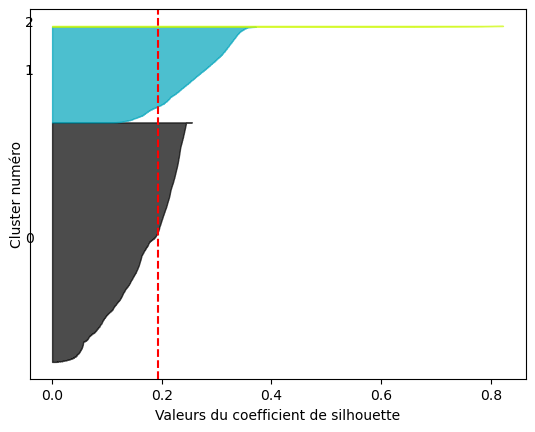

In [24]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score# Calcul des scores de silhouette pour chaque point de données
labels=clusters
sample_silhouette_values = silhouette_samples(data_scaled, labels)

# Création d'un graphique en barres pour afficher les scores de silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(num_clusters):
    # Regroupez les scores de silhouette pour chaque cluster et triez-les
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    # Calculez la hauteur de la barre
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Remplissez le graphique en barres
    color = plt.cm.nipy_spectral(float(i) / num_clusters)
  
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiquette pour les clusters
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcul de la prochaine position y_lower pour le prochain graphique
    y_lower = y_upper + 10

plt.xlabel("Valeurs du coefficient de silhouette")
plt.ylabel("Cluster numéro")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Ligne verticale pour le score de silhouette moyen
plt.yticks([])  # Supprimer les numéros de cluster (facultatif)
plt.show()


In [15]:
columns=selected_columns

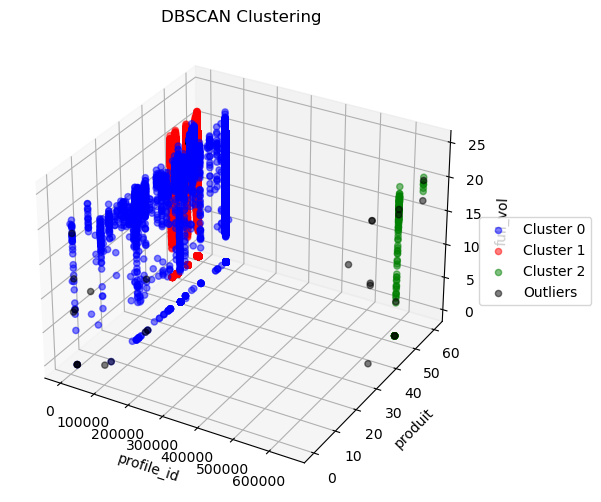

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Afficher le scatter plot 3D des résultats du clustering
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Données de clustering
# Assurez-vous d'avoir les données 'data', les étiquettes de cluster 'clusters', et les colonnes 'columns' définies

# Définir les couleurs pour chaque cluster
colors = ['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'brown', 'teal', 'lavender', 'olive', 'gold', 'salmon', 'lightblue', 'darkgreen', 'violet', 'lightgreen', 'coral', 'skyblue']

# Obtenez la liste des étiquettes de cluster uniques
cluster_labels = set(clusters)

for cluster_label in cluster_labels:
    if cluster_label == -1:
        # Echantillons aberrants (outliers) sont affichés en noir
        cluster_data = data[data['cluster'] == cluster_label][columns]
        ax.scatter(cluster_data[columns[0]], cluster_data[columns[1]], cluster_data[columns[2]], color='black', alpha=0.5, label='Outliers')
    else:
        # Echantillons du cluster sont affichés dans une couleur spécifique
        cluster_data = data[data['cluster'] == cluster_label][columns]
        color_index = list(cluster_labels).index(cluster_label) % len(colors)
        cluster_color = colors[color_index]
        ax.scatter(cluster_data[columns[0]], cluster_data[columns[1]], cluster_data[columns[2]], color=cluster_color, alpha=0.5, label='Cluster {}'.format(cluster_label))

ax.set_xlabel(columns[0])
ax.set_ylabel(columns[1])
ax.set_zlabel(columns[2])
ax.set_title('DBSCAN Clustering')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


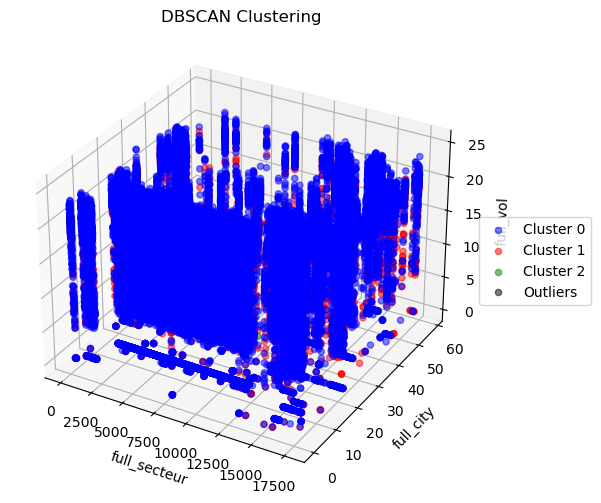

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Afficher le scatter plot 3D des résultats du clustering
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Données de clustering
# Assurez-vous d'avoir les données 'data', les étiquettes de cluster 'clusters', et les colonnes 'columns' définies

# Définir les couleurs pour chaque cluster
colors = ['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'brown', 'teal', 'lavender', 'olive', 'gold', 'salmon', 'lightblue', 'darkgreen', 'violet', 'lightgreen', 'coral', 'skyblue']

# Obtenez la liste des étiquettes de cluster uniques
cluster_labels = set(clusters)

for cluster_label in cluster_labels:
    if cluster_label == -1:
        # Echantillons aberrants (outliers) sont affichés en noir
        cluster_data = data[data['cluster'] == cluster_label][columns]
        ax.scatter(cluster_data[columns[3]], cluster_data[columns[4]], cluster_data[columns[2]], color='black', alpha=0.5, label='Outliers')
    else:
        # Echantillons du cluster sont affichés dans une couleur spécifique
        cluster_data = data[data['cluster'] == cluster_label][columns]
        color_index = list(cluster_labels).index(cluster_label) % len(colors)
        cluster_color = colors[color_index]
        ax.scatter(cluster_data[columns[3]], cluster_data[columns[4]], cluster_data[columns[2]], color=cluster_color, alpha=0.5, label='Cluster {}'.format(cluster_label))

ax.set_xlabel(columns[3])
ax.set_ylabel(columns[4])
ax.set_zlabel(columns[2])
ax.set_title('DBSCAN Clustering')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


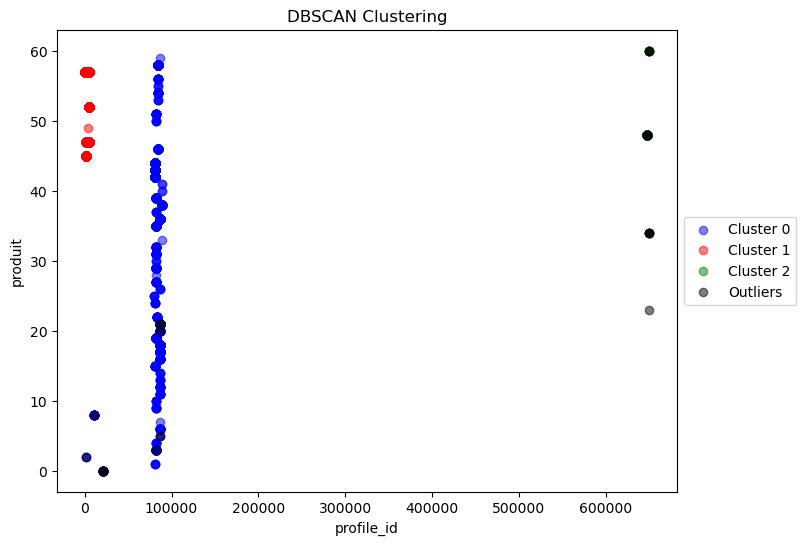

In [18]:
# Afficher le scatter plot 2D des résultats du clustering
plt.figure(figsize=(8, 6))

colors = ['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'brown', 'teal', 'lavender', 'olive', 'gold', 'salmon', 'lightblue']
 # Couleurs pour chaque cluster

for cluster_label in set(clusters):
    if cluster_label == -1:
        # Echantillons aberrants (outliers) sont affichés en noir
        cluster_data = data[data['cluster'] == cluster_label][columns]
        plt.scatter(cluster_data[columns[0]], cluster_data[columns[1]], color='black', alpha=0.5, label='Outliers')
    else:
        # Echantillons du cluster sont affichés dans une couleur spécifique
        cluster_data = data[data['cluster'] == cluster_label][columns]
        plt.scatter(cluster_data[columns[0]], cluster_data[columns[1]], color=colors[cluster_label % len(colors)], alpha=0.5, label='Cluster {}'.format(cluster_label))

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.title('DBSCAN Clustering')

# Afficher la légende
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()